# Sample Siemens Analysis

# Select Image & Phantom and Parse

In [1]:
imagePath = "/Volumes/CREST Data/David_S_Data/Thyroid_Analyzable/TRF01/uri_SpV1712_VpF512_FpA78_20190830131431.rfd"
phantomPath = "/Volumes/CREST Data/David_S_Data/Thyroid_Analyzable/Phantom/uri_SpV2232_VpF512_FpA90_20210129103529.rfd"

In [3]:
from pyquantus.parse.siemens import siemensRfParser

bmode, imgData, imgInfo, refData, refInfo = siemensRfParser(imagePath, phantomPath)

# ROI Selection (from GUI)

In [4]:
import pickle

pkl_name = "/Volumes/CREST Data/David_S_Data/Thyroid_Analyzable/Phantom/roi.pkl"

with open(pkl_name, 'rb') as f:
    roi_info = pickle.load(f)

In [6]:
from pathlib import Path

assert roi_info["Image Name"] == Path(imagePath).name
assert roi_info["Phantom Name"] == Path(phantomPath).name

In [7]:
splineX = roi_info["Spline X"]
splineY = roi_info["Spline Y"]
frame = roi_info["Frame"]

# Analysis Config (from GUI)

In [9]:
from pyquantus.qus import AnalysisConfig

pkl_name = "/Volumes/CREST Data/David_S_Data/Thyroid_Analyzable/Phantom/analysis-config.pkl"

with open(pkl_name, "rb") as f:
    config_info = pickle.load(f)

In [10]:
config = config_info["Config"]

# Spectral Analysis

In [11]:
from pyquantus.qus import UltrasoundImage

ultrasoundImage = UltrasoundImage()
ultrasoundImage.axialResRf = imgInfo.depth / imgData.rf[frame].shape[0]
ultrasoundImage.lateralResRf = ultrasoundImage.axialResRf * (
    imgData.rf[frame].shape[0]/imgData.rf[frame].shape[1]
) # placeholder
ultrasoundImage.bmode = imgData.bMode[frame]
ultrasoundImage.phantomRf = refData.rf[0]
ultrasoundImage.rf = imgData.rf[frame]

In [12]:
from pyquantus.qus import SpectralAnalysis

spectralAnalysis = SpectralAnalysis()
spectralAnalysis.ultrasoundImage = ultrasoundImage
spectralAnalysis.config = config
spectralAnalysis.initAnalysisConfig()
spectralAnalysis.splineX = splineX
spectralAnalysis.splineY = splineY

In [13]:
spectralAnalysis.generateRoiWindows()
spectralAnalysis.computeSpecWindows()

# Visualizations

In [14]:
from pyquantus.qus import SpectralData

spectralData = SpectralData()
spectralData.spectralAnalysis = spectralAnalysis

In [15]:
spectralData.convertImagesToRGB()

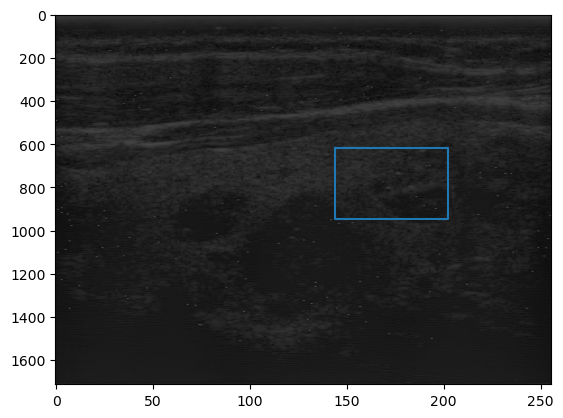

In [16]:
import matplotlib.pyplot as plt

plt.imshow(ultrasoundImage.bmode, aspect='auto')
plt.plot(splineX, splineY)

In [17]:
spectralData.drawCmaps()

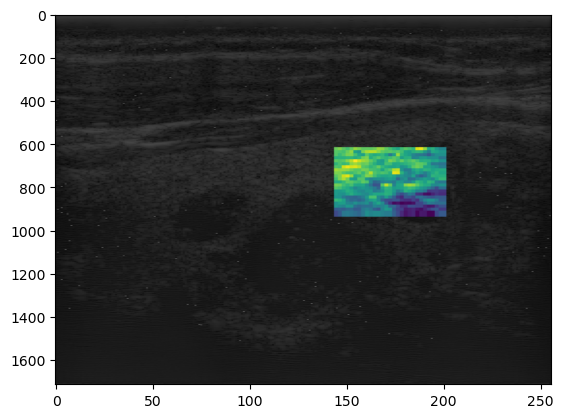

In [18]:
plt.imshow(spectralData.mbfIm, aspect='auto')

In [19]:
import numpy as np
np.mean(spectralData.mbfArr), np.mean(spectralData.siArr), np.mean(spectralData.ssArr)

(25.88452129734108, 55.98795057394226, -4.301765338531755e-06)